<p style="font-family: Times New Roman; font-size:3.75em;color:black; font-style:bold"><br>
Project A, Data Analysis and Visualization </p><br>

By: Peter Oh (jo299), Magd Bayoumi (mb2363), Eric Ma (lm669)

### Data Analysis (Summary and Data imputation)

Importing Necessary Modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline


# Data Summary

Basic Information:

- 81 Columns (Categories, i.e. OverallQual, YrSold, etc)
- 1461 Rows (Houses)
- Target Variable: SalePrice

In [2]:
path_to_train_data = './train.csv'
df = pd.read_csv(path_to_train_data)

print('Number of houses:', format(df.shape[0]))
print ('Number of features:', format(df.shape[1]-2))

df.head(10)

Number of houses: 1460
Number of features: 79


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Data Imputation

In [4]:
null_cols = df.columns[df.isnull().any()]
print(null_cols)
df[null_cols].isnull().sum()

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We filled in NaN values in "LotFrontage" with 0.0 because it is the area of the lot of the house and if there is no lot, then 0.0 for area of lot makes sense.

We filled in NaN values in "Alley" with "None" because the description for NaN in Alley says "no alley access" so "None" makes sense. 

In [5]:
df.LotFrontage.fillna(0.0, inplace=True)
df.Alley.fillna("None",inplace=True)

We filled in NaN values in "MasVnrType" with "None" because if a house does not have Masonry veneer, no Masonry veneer exists so "None" makes sense. 

We filled in NaN values in "MasVnrArea" with 0.0 because if a house does not have a Masonry veneer, its area would have to be 0.0.

In [6]:
df.MasVnrType.fillna("None",inplace=True)
df.MasVnrArea.fillna(0.0, inplace=True)

We filled in NaN values in "BsmtQual", "BsmtCond","BsmtExposure", "BsmtFinType1", and "BsmtFinType2" with "None" because the data description shows that the NaN for the correseponding columns means "no basement" so "None" makes sense. 

In [7]:
df.BsmtQual.fillna("None",inplace=True)
df.BsmtCond.fillna("None",inplace=True)
df.BsmtExposure.fillna("None",inplace=True)
df.BsmtFinType1.fillna("None",inplace=True)
df.BsmtFinType2.fillna("None",inplace=True)

We filled in NaN values in "Electrical" with "Sbrkr" because most houses use standard circuit breakers so we assumed that this house used a standard circuit breaker (SBrkr for short)

In [9]:
df.Electrical.fillna("SBrkr",inplace=True)

We filled in NaN values in "FireplaceQu" with "None" because data description says NaN means "no fireplace" so "None" makes sense here.

In [10]:
df.FireplaceQu.fillna("None",inplace=True)

We filled in NaN values in "GarageType", "GarageYrBlt","GarageFinish", "GarageQual", and "GarageCond" with "None" because the data description shows that the NaN for the correseponding columns means "no garage" so "None" makes sense. 

In [11]:
df.GarageType.fillna("None",inplace=True)
df.GarageYrBlt.fillna("None",inplace=True)
df.GarageFinish.fillna("None",inplace=True)
df.GarageQual.fillna("None",inplace=True)
df.GarageCond.fillna("None",inplace=True)

We filled in NaN values in "PoolQC" with "None" because the data description shows that NaN value means "no pool" so "None" makes sense here. 

In [12]:
df.PoolQC.fillna("None",inplace=True)

We filled in NaN values in "Fence" with "None" because the data description shows that NaN value means "no fence" so "None" makes sense here. 

In [13]:
df.Fence.fillna("None",inplace=True)

We filled in NaN values in "MiscFeature" with "None" because the data description shows that NaN value means "no miscellaneous feature" so "None" makes sense here. 

In [14]:
df.MiscFeature.fillna("None",inplace=True)

Checking to make sure no null values exist. 

In [15]:
null_cols = df.columns[df.isnull().any()]
print(null_cols)
df[null_cols].isnull().sum()

Index([], dtype='object')


Series([], dtype: float64)

# Understanding Correlation with Imputated Data

We wanted to see which correlations were the highest in order to make clear visualizations.

In [16]:
dfcorr = df.corr()
dfcorr = dfcorr['SalePrice']

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df.corr(), 20))

df.corr()

Top Absolute Correlations
GarageCars    GarageArea      0.987024
TotalBsmtSF   1stFlrSF        0.968465
OverallQual   SalePrice       0.964221
GrLivArea     TotRmsAbvGrd    0.944843
GarageCars    SalePrice       0.905948
GarageArea    SalePrice       0.901784
OverallQual   GarageCars      0.900998
              GarageArea      0.878210
BsmtFinSF1    BsmtFullBath    0.877489
YearBuilt     YearRemodAdd    0.869774
GrLivArea     FullBath        0.856720
OverallQual   YearBuilt       0.849385
YearBuilt     GarageCars      0.846074
OverallQual   YearRemodAdd    0.839461
BedroomAbvGr  TotRmsAbvGrd    0.835116
OverallQual   FullBath        0.832218
GrLivArea     SalePrice       0.824875
2ndFlrSF      HalfBath        0.821965
TotalBsmtSF   SalePrice       0.817023
YearBuilt     GarageArea      0.816531
dtype: float64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.019761,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.215023,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,...,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Converting Qualitative Categories into Numerical categories, 

In [17]:
print ('ExterQual:    {0}'.format(df['ExterQual'].unique()))
print ('ExterCond:    {0}'.format(df['ExterCond'].unique()))
print ('BsmtQual:     {0}'.format(df['BsmtQual'].unique()))
print ('BsmtCond:     {0}'.format(df['BsmtCond'].unique()))
print ('HeatingQC:    {0}'.format(df['HeatingQC'].unique()))
print ('KitchenQual:  {0}'.format(df['KitchenQual'].unique()))
print ('FireplaceQu:  {0}'.format(df['FireplaceQu'].unique()))
print ('GarageQual:   {0}'.format(df['GarageQual'].unique()))
print ('GarageCond:   {0}'.format(df['GarageCond'].unique()))
print ('PoolQC:       {0}'.format(df['PoolQC'].unique()))
print ('\n')
print ('BsmtExposure: {0}'.format(df['BsmtExposure'].unique()))
print ('BsmtFinType1: {0}'.format(df['BsmtFinType1'].unique()))
print ('BsmtFinType2: {0}'.format(df['BsmtFinType2'].unique()))
print ('Functional:   {0}'.format(df['Functional'].unique()))
print ('GarageFinish: {0}'.format(df['GarageFinish'].unique()))
print ('Fence:        {0}'.format(df['Fence'].unique()))

ExterQual:    ['Gd' 'TA' 'Ex' 'Fa']
ExterCond:    ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual:     ['Gd' 'TA' 'Ex' 'None' 'Fa']
BsmtCond:     ['TA' 'Gd' 'None' 'Fa' 'Po']
HeatingQC:    ['Ex' 'Gd' 'TA' 'Fa' 'Po']
KitchenQual:  ['Gd' 'TA' 'Ex' 'Fa']
FireplaceQu:  ['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageQual:   ['TA' 'Fa' 'Gd' 'None' 'Ex' 'Po']
GarageCond:   ['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']
PoolQC:       ['None' 'Ex' 'Fa' 'Gd']


BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'None' 'LwQ']
BsmtFinType2: ['Unf' 'BLQ' 'None' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Functional:   ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']
GarageFinish: ['RFn' 'Unf' 'Fin' 'None']
Fence:        ['None' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [18]:
quality_dictionary = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
df['ExterQual']   = df['ExterQual'].map(quality_dictionary).astype(int)
df['ExterCond']   = df['ExterCond'].map(quality_dictionary).astype(int)
df['BsmtQual']    = df['BsmtQual'].map(quality_dictionary).astype(int)
df['BsmtCond']    = df['BsmtCond'].map(quality_dictionary).astype(int)
df['HeatingQC']   = df['HeatingQC'].map(quality_dictionary).astype(int)
df['KitchenQual'] = df['KitchenQual'].map(quality_dictionary).astype(int)
df['FireplaceQu'] = df['FireplaceQu'].map(quality_dictionary).astype(int)
df['GarageQual']  = df['GarageQual'].map(quality_dictionary).astype(int)
df['GarageCond']  = df['GarageCond'].map(quality_dictionary).astype(int)
df['PoolQC']      = df['PoolQC'].map(quality_dictionary).astype(int)

del quality_dictionary

In [19]:
df['BsmtExposure'] = df['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}).astype(int)

bsmtdict = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmtdict).astype(int)
df['BsmtFinType2'] = df['BsmtFinType2'].map(bsmtdict).astype(int)

df['Functional'] = df['Functional'].map({'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                         'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}).astype(int)

df['GarageFinish'] = df['GarageFinish'].map({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}).astype(int)
df['Fence'] = df['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}).astype(int)

del bsmtdict

Heat Map of Correlation Table

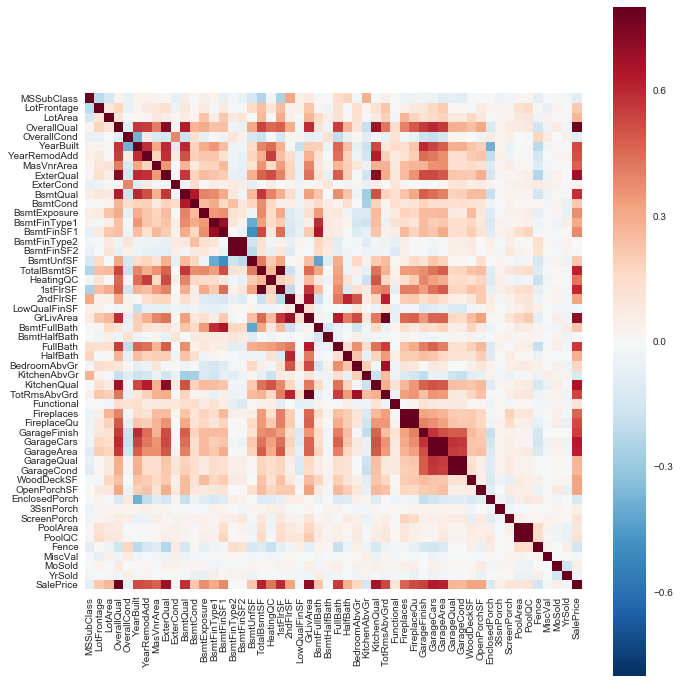

In [20]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmin=-0.8, vmax=0.8, square=True)
f.tight_layout()

del corr

Side-ways Bar Graph of Correlation w/ SalePrice

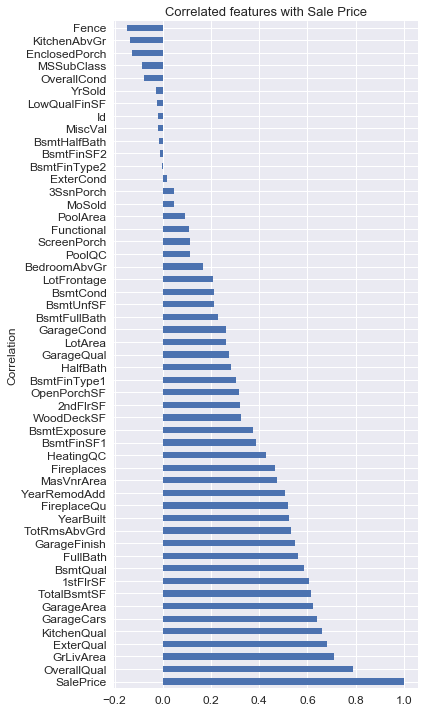

In [21]:
corr_sale=df.corr()["SalePrice"]

fig, ax = plt.subplots(figsize = (6, 10))
corr_sale[np.argsort(corr_sale, axis=0)[::-1]].plot(kind='barh')
plt.tick_params(labelsize=12)
plt.ylabel("Correlation",size=12)
plt.title('Correlated features with Sale Price', size=13)
plt.tight_layout()

del corr_sale

# Data Visualization, Set One (Overall Quality vs. Sale Price)

Box Plot Graph of SalePrice and OverallQuality

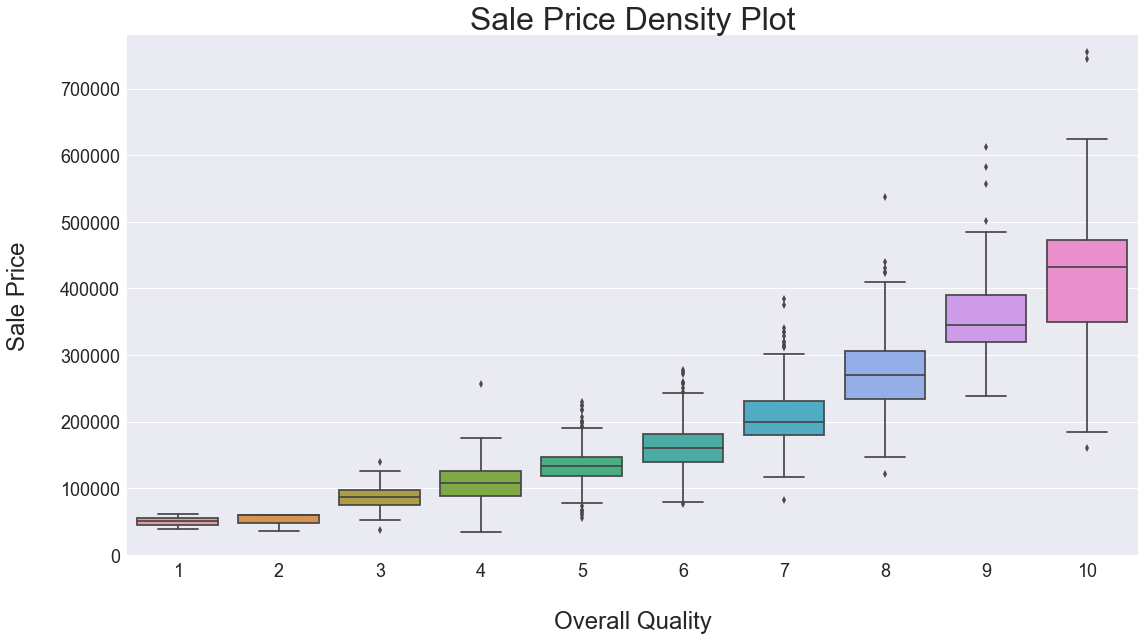

In [23]:
fig, ax = plt.subplots(figsize = (16, 9))
sns.boxplot('OverallQual', 'SalePrice', data = df, ax = ax).set(ylim = (0, 780000))
ax.set_title("SalePrice VS OverallQual",size=13)
ax.tick_params(labelsize=18)
ax.set_xlabel('Overall Quality',fontsize=24, labelpad=30)
ax.set_ylabel('Sale Price ($)',fontsize=24, labelpad=30)
ax.set_title('Sale Price Stats vs. Overall Quality', fontsize=32)
plt.tight_layout()

What we learned from Graph 1:

    - Upward trend, as quality increaseas sale price also increases
    - House with 10 quality have a very big range so the whiskers for quality 10 houses are wider––this could be due to the fact that the sample size is small for quality 10 houses
    - more outliers on the graph as quality of house increases
    - as the quality of house increases, the range of sale price increase––this is seen by the increase of box sizes

Scatter Plot Graph of SalePrice and OverallQuality (w/ Linear Regression)

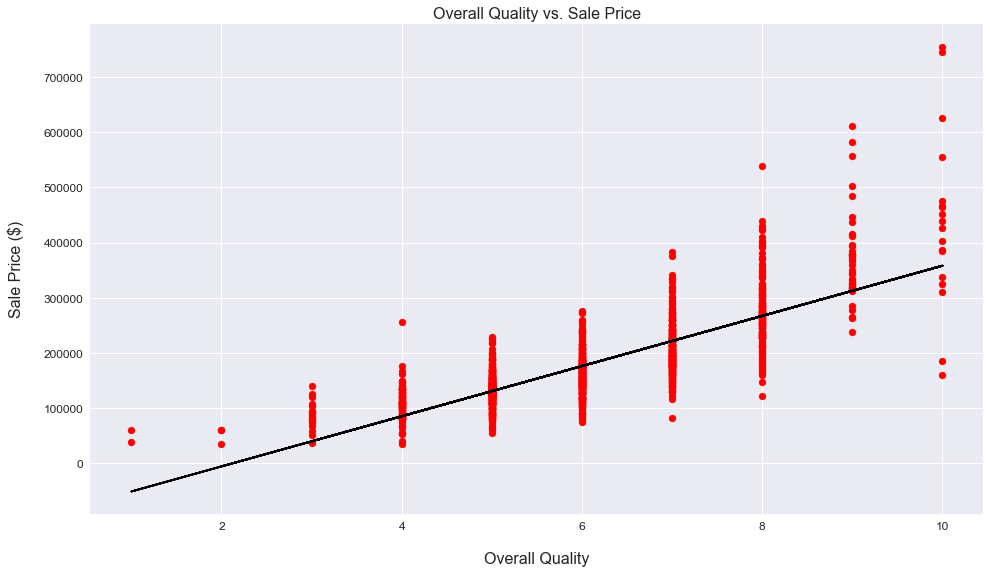

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

fig, ax = plt.subplots(figsize=(16,9))

X = df['OverallQual'].values[:,np.newaxis]

y = df['SalePrice'].values

model = LinearRegression()

model.fit(X,y)

plt.scatter(X, y, color='r')

plt.plot(X, model.predict(X), color = 'k')
ax.set_title('Overall Quality vs. Sale Price', fontsize=16)
ax.tick_params(labelsize=12)
ax.set_xlabel('Overall Quality', fontsize=16, labelpad=20)
ax.set_ylabel('Sale Price ($)', fontsize=16, labelpad=20)

plt.show()

In [39]:
print("Regression Coeff: \n", model.coef_)

Regression Coeff: 
 [ 45435.8025931]


What we learned from Graph 2:

    - general increasing trend of the graph, positive correlation
    - explictly shows the change in sample size as quality of house decreases
    - as the quality of house increases, the spread (variance) of data increases
    - an increase of quality in house by one unit changes predicted sale price by approximately $45,436

# Data Visualization, Set Two (Garage Cars vs. Sale Price)

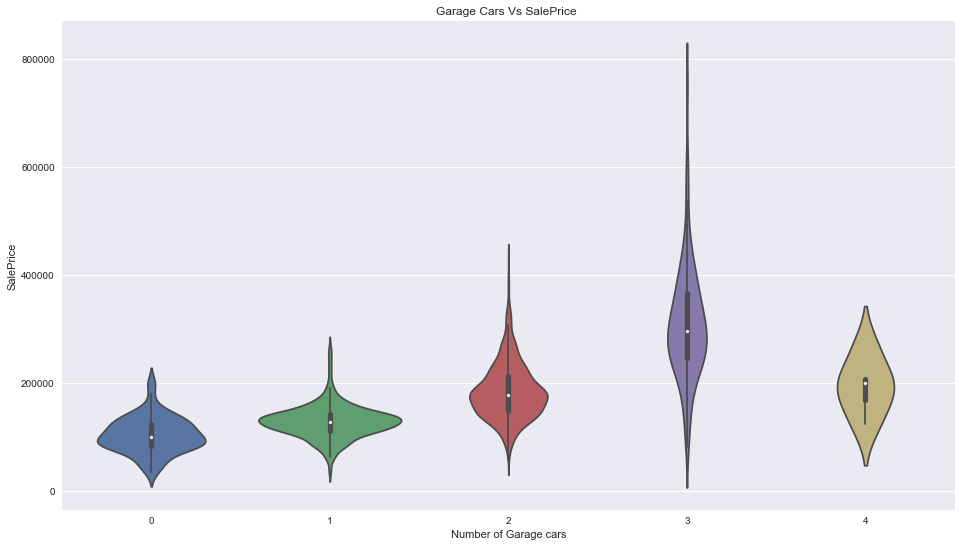

In [25]:
plt.figure(figsize=(16,9))
sns.violinplot(df["GarageCars"],df["SalePrice"])
plt.title("Garage Cars Vs SalePrice ")
plt.ylabel("SalePrice ($)")
plt.xlabel("Number of Garage cars");

What we learned from Graph 3:

    - houses with 3 garage cars have the biggest range in sale price as seen by the height of the violin graph
    - there is an increasing trend of range in sale price as you increase garage cars from 0 to 3, but at 4 the price range drops
    - we can see the highest and lowest sale price for houses with different garage cars
    - for houses with 0 garage cars, the most common sale price is approximately $150,000